# EXPLORATARY ANALYSIS OF AMAZON'S TOP 50 BESTSELLING BOOKS 

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
#Using Profile Report for summarising the data 
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#No missing values
#Small dataset of 550 rows and 7 columns
#Two variables with high cardinality
#Free book titles are also included
#Average Rating of 4.6 

In [7]:
count_author = df['Author'].value_counts()
count_author

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
                                      ..
Adam Gasiewski                         1
Michael Lewis                          1
Chris Cleave                           1
Adir Levy                              1
Thomas Piketty                         1
Name: Author, Length: 248, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

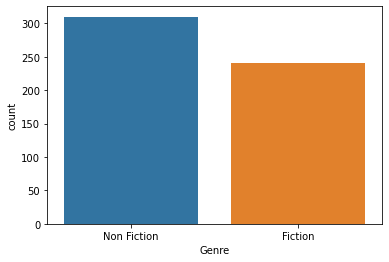

In [8]:
#genre count distribution
sns.countplot(data = df, x = 'Genre')

<AxesSubplot:xlabel='Price', ylabel='count'>

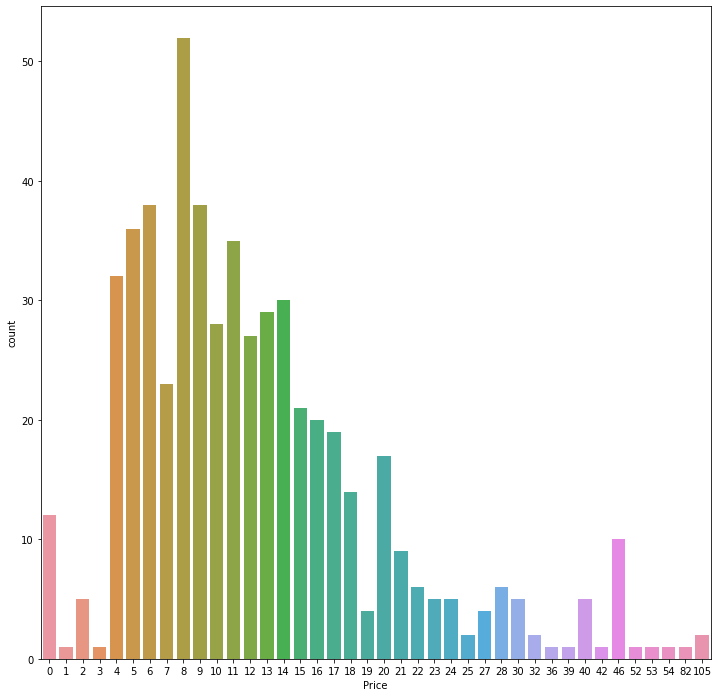

In [9]:
#price offering counts
plt.subplots(figsize=(12,12))
sns.countplot(data = df, x = 'Price')

<AxesSubplot:xlabel='Year', ylabel='count'>

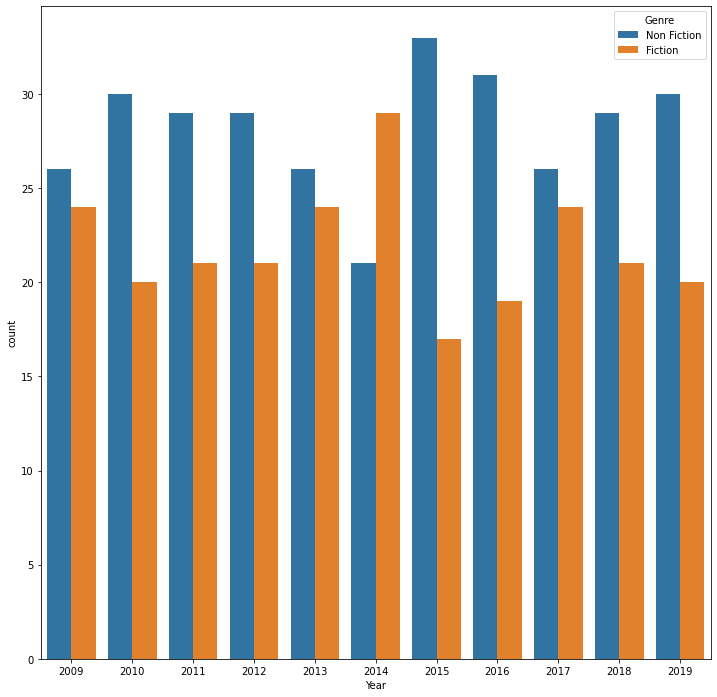

In [10]:
#fiction & non-fiction by years
plt.subplots(figsize=(12,12))
sns.countplot(data = df, x = 'Year', hue = 'Genre')

<AxesSubplot:xlabel='User Rating', ylabel='count'>

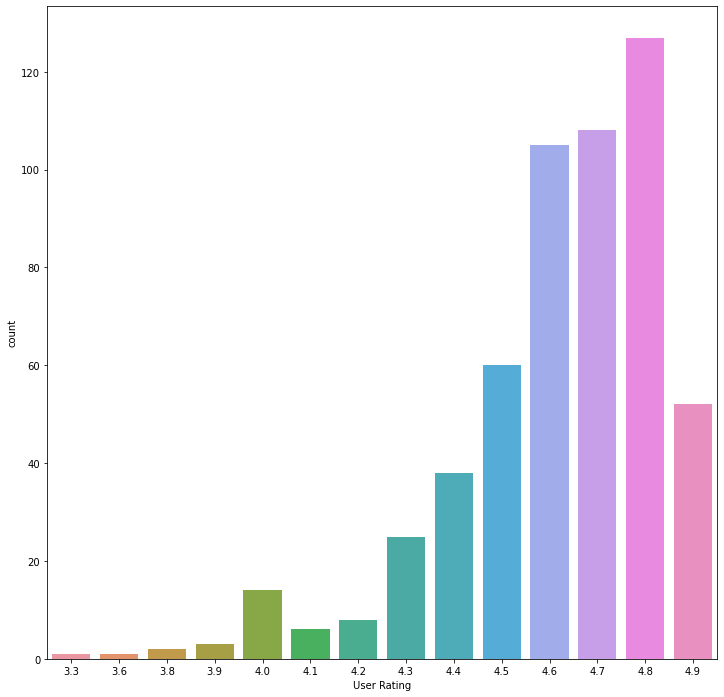

In [11]:
#ratings count plot
plt.subplots(figsize=(12,12))
sns.countplot(data = df, x = 'User Rating')

<AxesSubplot:xlabel='User Rating', ylabel='count'>

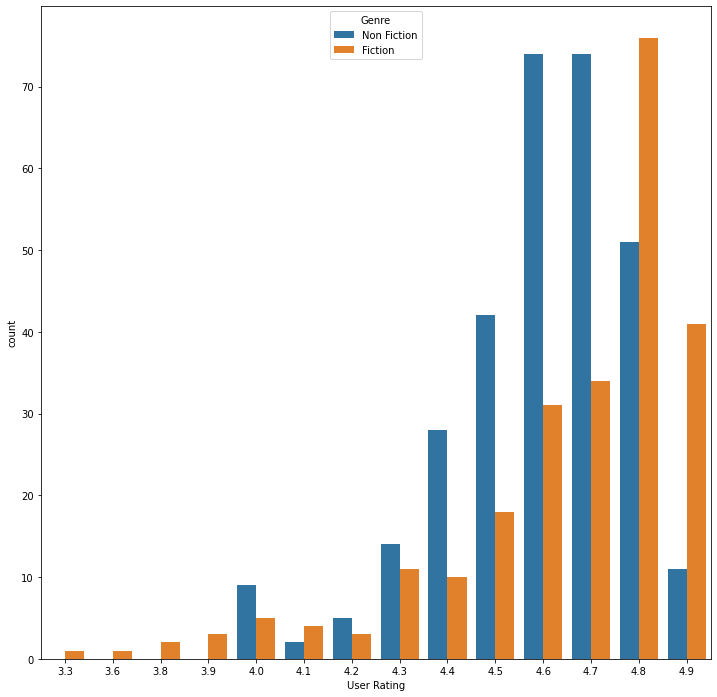

In [12]:
#rating by genre
plt.subplots(figsize=(12,12))
sns.countplot(data = df, x = 'User Rating', hue = 'Genre')

In [13]:
#getting the counts of each occurences of the author
counts = df['Author'].value_counts()

In [14]:
counts

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
                                      ..
Adam Gasiewski                         1
Michael Lewis                          1
Chris Cleave                           1
Adir Levy                              1
Thomas Piketty                         1
Name: Author, Length: 248, dtype: int64

<AxesSubplot:xlabel='Author', ylabel='count'>

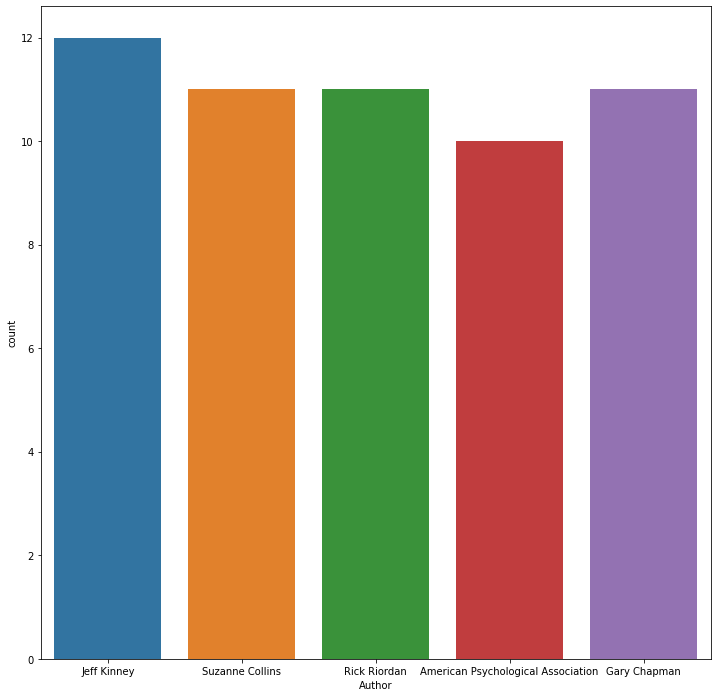

In [15]:
#plotting the authors having more than 9 best selling titles
plt.subplots(figsize=(12,12))
sns.countplot(x = 'Author',data = df[df['Author'].isin(counts[counts>9].index)])

# DATA CLEANING

We will be doing Clustering for this data set. 
Clustering will be down on the 
For this purpose we will be dropping years column. 
After dropping we will be checking for dupicates entries and dropping them as well.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [17]:
df.drop(['Year'], axis = 'columns', inplace = True )

In [18]:
#unique values taken by the attribute author
authors = df['Author'].sort_values().unique()
authors

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

In [19]:
df.replace('George R. R. Martin', 'George R.R. Martin', inplace = True)

In [20]:
df.replace('J. K. Rowling','J.K. Rowling', inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Genre        550 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 25.9+ KB


In [22]:
#dropping duplicates
df = df.drop_duplicates(keep = 'first')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


Initially we had 550, now we have 361 entries after removing duplicacy due to years

In [24]:
df['Name'].value_counts()

The Help                                                                                              3
Unbroken: A World War II Story of Survival, Resilience, and Redemption                                2
Gone Girl                                                                                             2
To Kill a Mockingbird                                                                                 2
Quiet: The Power of Introverts in a World That Can't Stop Talking                                     2
                                                                                                     ..
Glenn Beck's Common Sense: The Case Against an Out-of-Control Government, Inspired by Thomas Paine    1
The Racketeer                                                                                         1
If I Stay                                                                                             1
Ultimate Sticker Book: Frozen: More Than 60 Reusable Full-Color 

There is still some duplicacy

In [25]:
df[df['Name'] == 'The Girl on the Train']

,Name,Author,User Rating,Reviews,Price,Genre
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,Fiction


Price difference is causing the dupicacy

In [26]:
df = df.drop_duplicates(subset='Name', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Genre        351 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.2+ KB


In [27]:
df['Name'].value_counts()

A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons    1
Sycamore Row (Jake Brigance)                                                                          1
The Throne of Fire (The Kane Chronicles, Book 2)                                                      1
National Geographic Kids Why?: Over 1,111 Answers to Everything                                       1
Eat This Not That! Supermarket Survival Guide: The No-Diet Weight Loss Solution                       1
                                                                                                     ..
Ultimate Sticker Book: Frozen: More Than 60 Reusable Full-Color Stickers                              1
Sookie Stackhouse                                                                                     1
Broke: The Plan to Restore Our Trust, Truth and Treasure                                              1
Little Bee: A Novel                                             

We have now removed all the duplicates

In [28]:
df.shape

(351, 6)

# CLUSTERING KMeans

In [29]:
from sklearn.cluster import KMeans

In [30]:
df.head()

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [31]:
#dropping Name and Author Features
data = df.drop(['Name', 'Author'], axis = 'columns')

In [32]:
data.head()

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,Non Fiction
1,4.6,2052,22,Fiction
2,4.7,18979,15,Non Fiction
3,4.7,21424,6,Fiction
4,4.8,7665,12,Non Fiction


In [33]:
#encoding the genre
#0 for Non-Fiction and 1 for Fiction
data['Genre'].replace(to_replace = 'Non Fiction', value = '0', inplace=True)

In [34]:
data['Genre'].replace(to_replace = 'Fiction', value = '1', inplace=True)

In [35]:
data.head()

,User Rating,Reviews,Price,Genre
0,4.7,17350,8,0
1,4.6,2052,22,1
2,4.7,18979,15,0
3,4.7,21424,6,1
4,4.8,7665,12,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User Rating  351 non-null    float64
 1   Reviews      351 non-null    int64  
 2   Price        351 non-null    int64  
 3   Genre        351 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 13.7+ KB


In [37]:
X = data.values
X

array([[4.7, 17350, 8, '0'],
       [4.6, 2052, 22, '1'],
       [4.7, 18979, 15, '0'],
       ...,
       [4.8, 21625, 9, '1'],
       [4.9, 9413, 8, '1'],
       [4.7, 14331, 8, '0']], dtype=object)

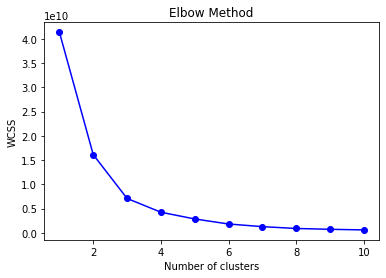

In [38]:
#WCSS is within cluster sum of squares: sum of square of distances between each memeber in the cluster as well as the centeroid.
#using Elbow Method to find out the optimum number of clusters.
#we train multiple models with different cluster values
#k-means++ ensures that you get don’t fall into the random initialization trap.
#minimizing criteria inertia_ /wcss
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#cluster = 3
kmeans = KMeans(n_clusters=3,init = 'k-means++')
y = kmeans.fit_predict(X)

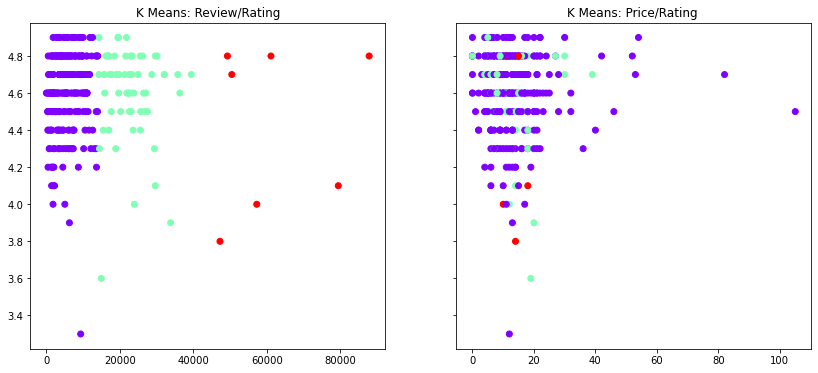

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))

ax1.set_title('K Means: Review/Rating')
ax1.scatter(data['Reviews'],data['User Rating'],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("K Means: Price/Rating ")
ax2.scatter(data['Price'],data['User Rating'],c=kmeans.labels_,cmap ='rainbow')

In [41]:
#cluster = 4
kmeans = KMeans(n_clusters=4,init = 'k-means++')
y = kmeans.fit_predict(X)

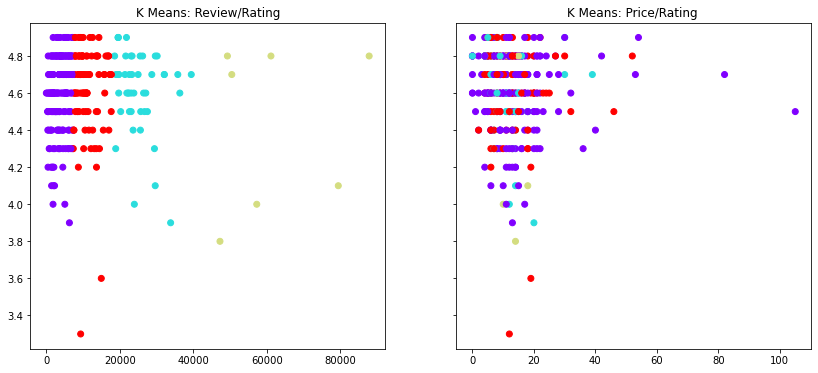

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))

ax1.set_title('K Means: Review/Rating')
ax1.scatter(data['Reviews'],data['User Rating'],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("K Means: Price/Rating ")
ax2.scatter(data['Price'],data['User Rating'],c=kmeans.labels_,cmap ='rainbow')